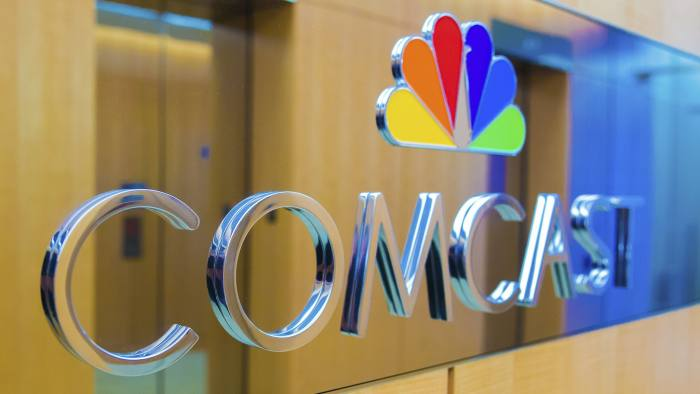

# PROBLEM STATEMENT

Comcast is an American global telecommunication company. The firm has been providing terrible customer service. They continue to fall short despite repeated promises to improve. Only last month (October 2016) the authority fined them a $2.3 million, after receiving over 1000 consumer complaints.<br>
The existing database will serve as a repository of public customer complaints filed against Comcast.
It will help to pin down what is wrong with Comcast's customer service.

<b>Data Dictionary<br></b>
       <i>&emsp;&emsp;&emsp;•	Ticket #: Ticket number assigned to each complaint<br>
       &emsp;&emsp;&emsp;•	Customer Complaint: Description of complaint<br>
       &emsp;&emsp;&emsp;•	Date: Date of complaint<br>
       &emsp;&emsp;&emsp;•	Time: Time of complaint<br>
       &emsp;&emsp;&emsp;•	Received Via: Mode of communication of the complaint<br>
       &emsp;&emsp;&emsp;•	City: Customer city<br>
       &emsp;&emsp;&emsp;•	State: Customer state<br>
       &emsp;&emsp;&emsp;•	Zip code: Customer zip<br>
       &emsp;&emsp;&emsp;•	Status: Status of complaint<br>
       &emsp;&emsp;&emsp;•	Filing on behalf of someone</i>

<b>Analysis Task</b><br>
To perform these tasks, you can use any of the different Python libraries such as NumPy, SciPy, Pandas, scikit-learn matplotlib, and BeautifulSoup.<br>
- Import data into Python environment.<br><br>
- Provide the trend chart for the number of complaints at monthly and daily granularity levels.<br><br>
- Provide a table with the frequency of complaint types.<br>
     &emsp;&emsp;&emsp;* Which complaint types are maximum i.e., around internet, network issues, or across any other domains.<br><br>

- Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.<br><br>

- Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:<br>
    &emsp;&emsp;&emsp;* Which state has the maximum complaints<br>
    &emsp;&emsp;&emsp;*	Which state has the highest percentage of unresolved complaints<br><br>

- Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.<br><br>
<b>The analysis results to be provided with insights wherever applicable.</b>


In [1]:
# Import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Analysis Task 1 -> Import data into python environment

In [2]:
# Read the file and display the first few rows of the file
data_set = pd.read_csv("C:/Users/VAIO/Downloads/SimpliLearn/DS with Python/Assessment/Comcast Telecom Consumer Complaints/Comcast_telecom_complaints_data.csv")
data_set.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [3]:
# View the information about the data e.g. index dtype and column dtypes, non-null values and memory usage.
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [4]:
# View the dimensions of the dataframe - Total no of records and columns
data_set.shape

(2224, 11)

# Analysis Task 2 (a) -> Find the trend chart for Daily Complaints

In [5]:
# Coverting the Date feature to 'datatime64' datatype 
# Creating new Dataframe with sorted Date and No of Complaints raised on each day
data_set['Date'] = pd.to_datetime(data_set["Date"], dayfirst=True)
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Ticket #                     2224 non-null   object        
 1   Customer Complaint           2224 non-null   object        
 2   Date                         2224 non-null   datetime64[ns]
 3   Date_month_year              2224 non-null   object        
 4   Time                         2224 non-null   object        
 5   Received Via                 2224 non-null   object        
 6   City                         2224 non-null   object        
 7   State                        2224 non-null   object        
 8   Zip code                     2224 non-null   int64         
 9   Status                       2224 non-null   object        
 10  Filing on Behalf of Someone  2224 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(9)
m

In [6]:
dailyComplaint = data_set['Date'].value_counts().sort_index().reset_index().rename(columns = {"index": "Dates","Date":"Total Complaints"})
dailyComplaint.head()

,Dates,Total Complaints
0,2015-01-04,18
1,2015-01-05,12
2,2015-01-06,25
3,2015-02-04,27
4,2015-02-05,7


In [7]:
# Convert Date into the user defined format using lamda function
dailyComplaint['Dates'] = dailyComplaint['Dates'].apply(lambda d: d.strftime("%d %m"))
dailyComplaint.head()

,Dates,Total Complaints
0,04 01,18
1,05 01,12
2,06 01,25
3,04 02,27
4,05 02,7


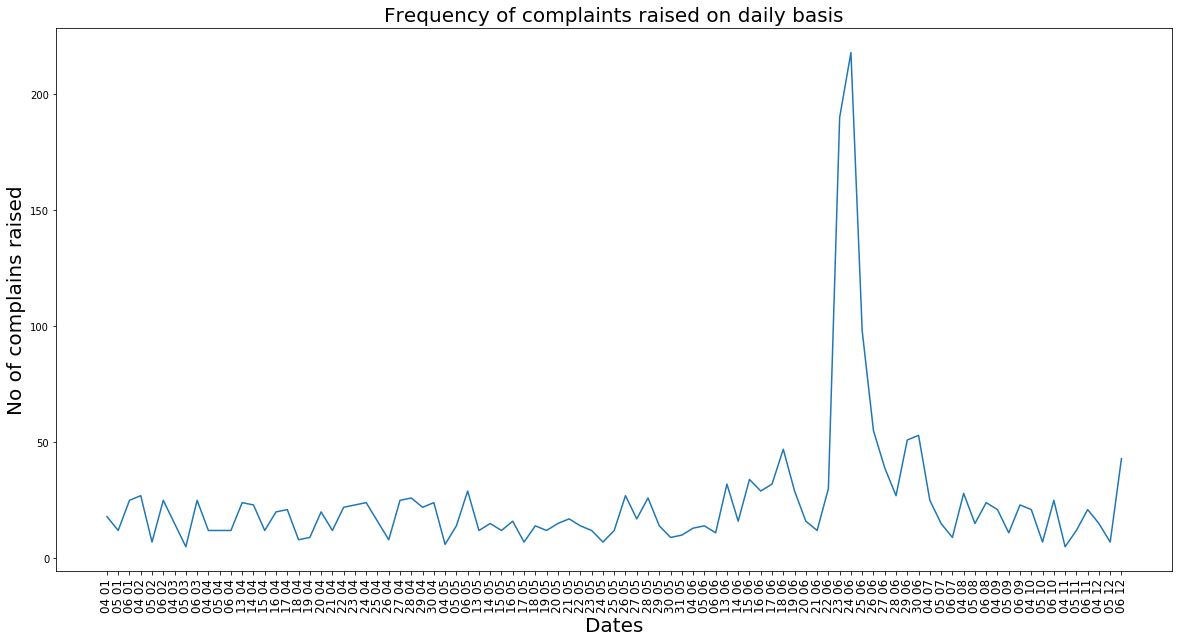

In [8]:
# Visualize the trend chart for complaints raised on Daily basis
plt.subplots(figsize=(20,10))
plt.plot(dailyComplaint.Dates,dailyComplaint['Total Complaints'], label = "Daily Complaints")
plt.tick_params(axis="x",labelrotation=90, labelsize = 12)
plt.xlabel("Dates",  fontdict = {'fontsize' : 20})
plt.ylabel("No of complains raised",  fontdict = {'fontsize' : 20})
plt.title("Frequency of complaints raised on daily basis",  fontdict = {'fontsize' : 20})
plt.show()

Analysis Result: We can clearly visualize that maximum no of complaints were raised on 23nd June 2019 and next highest on 24th June 2019, with almost 200+ complaints on each day.

# Analysis Task 2 (b) -> Find the trend chart for Monthly Complaints

In [9]:
# Covert Date_month_year to datetime64 datatype
data_set['Date_month_year'] = pd.to_datetime(data_set['Date_month_year'])
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Ticket #                     2224 non-null   object        
 1   Customer Complaint           2224 non-null   object        
 2   Date                         2224 non-null   datetime64[ns]
 3   Date_month_year              2224 non-null   datetime64[ns]
 4   Time                         2224 non-null   object        
 5   Received Via                 2224 non-null   object        
 6   City                         2224 non-null   object        
 7   State                        2224 non-null   object        
 8   Zip code                     2224 non-null   int64         
 9   Status                       2224 non-null   object        
 10  Filing on Behalf of Someone  2224 non-null   object        
dtypes: datetime64[ns](2), int64(1), object(8)
m

In [10]:
# Create a new DataFrame 'Month' with only the month field and sort the value month wise
data_set['Month'] = data_set.Date_month_year.dt.month
monthly_complaint_analysis = data_set.sort_values(by='Month')

In [11]:
# create a variable with values groupedby 'Month'
grouped_month = monthly_complaint_analysis.groupby('Month')

In [12]:
# Calculate the total no of tickets raised for the prticular month
monthlyComplaints = grouped_month.agg({"Ticket #" : "count"})
print(monthlyComplaints.count)

<bound method DataFrame.count of        Ticket #
Month          
1            55
2            59
3            45
4           375
5           317
6          1046
7            49
8            67
9            55
10           53
11           38
12           65>


In [13]:
# Change the labels from Month index to Month Name
labels = ("0","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sept","Oct","Nov","Dec")
positions = (0,1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)

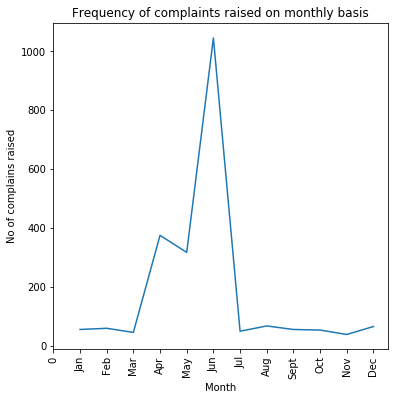

In [14]:
# Visualize the trand chart for complaints raised on Monthly basis
plt.subplots(figsize=(6,6))
plt.plot(monthlyComplaints)
plt.tick_params(axis="x",labelrotation=90, labelsize = 10)
plt.xlabel("Month",  fontdict = {'fontsize' : 10})
plt.xticks(np.arange(0, 12, 1)) 
plt.xticks(positions,labels)
plt.ylabel("No of complains raised",  fontdict = {'fontsize' : 10})
plt.title("Frequency of complaints raised on monthly basis",  fontdict = {'fontsize' : 12})
plt.show()

Analysis Result: The maximum no of complaints were raised in the month of June with 1000+ complaints and second highest in the month of April with 400+ complaints.

# Task 3 -> Which complaint types are maximum 

In [15]:
# Import libraries for Naltural Language Processing 
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
from wordcloud import WordCloud

stopwords = set(stopwords.words('english'))
punctuation = set(string.punctuation)
lemmatizer = WordNetLemmatizer()

In [16]:
# Create a fucntion to clean ip the data and remove all punctuations, stopwords and lemmitize the words
def data_cleanup(complaint):
    complaint = complaint.lower()
    no_punctuation = [char for char in complaint if char not in string.punctuation]
    no_punctuation = ''.join(no_punctuation)
    no_stopwords = [ word for word in no_punctuation.split() if word not in stopwords]
    lemmatized = [lemmatizer.lemmatize(word) for word in no_stopwords]
    return lemmatized

In [17]:
# Create the Matrix using the CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
bag_of_words = CountVectorizer(analyzer=data_cleanup).fit(data_set["Customer Complaint"])
print(len(bag_of_words.vocabulary_))
#bag_of_words.vocabulary_
#bag_of_words.get_feature_names()

1398


In [18]:
bag_of_words_transform = bag_of_words.transform(data_set["Customer Complaint"])

In [19]:
from sklearn.feature_extraction.text import TfidfTransformer
tfid_model = TfidfTransformer().fit(bag_of_words_transform)

In [20]:
# Calculate the IDF values and sort it in ascending order
word_counts = pd.DataFrame(tfid_model.idf_, index=bag_of_words.get_feature_names(),columns=["Word Weight"])
word_counts_sorted = word_counts.sort_values(by=['Word Weight'])
word_counts_sorted.head(5)

,Word Weight
comcast,1.632549
internet,2.465289
service,2.537901
billing,3.065605
data,3.318440


In [21]:
tfid_transform = tfid_model.transform(bag_of_words_transform)
tfid_transform.shape

(2224, 1398)

In [22]:
# Create a vector that contains the sum of each word occurrence in all texts in the corpus
sum_words = bag_of_words_transform.sum(axis=0)

words_freq = [(word, sum_words[0, idx]) for word, idx in bag_of_words.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)

In [23]:
Word_Count = pd.DataFrame(words_freq, columns= ['Words','Count']).set_index('Words')
Word_Count.head(5)

,Count
Words,
comcast,1183
internet,517
service,496
billing,283
data,219


In [24]:
Word_Count.drop('comcast', inplace=True)
Word_Count['Count'].idxmax()

'internet'

Analysis Result: From above, we infer that the maximum words used in the complaints revolves around 'Internet'. Hence, maximum compliant types are related to 'INTERNET'. We can Visualize the data in below line of codes.

In [25]:
# Table with different complaint type and their count
Word_Cloud = Word_Count.reset_index()
Word_Cloud.head(5)

,Words,Count
0,internet,517
1,service,496
2,billing,283
3,data,219
4,speed,187


In [26]:
# Create a Data frame with 10 frequently used words, for the visualization purpose
Most_Used_Words = Word_Cloud.iloc[:10,:]
Most_Used_Words

,Words,Count
0,internet,517
1,service,496
2,billing,283
3,data,219
4,speed,187
5,cap,181
6,issue,120
7,charge,94
8,customer,91
9,practice,81


Text(0.5, 1.0, 'Most Repeated Word')

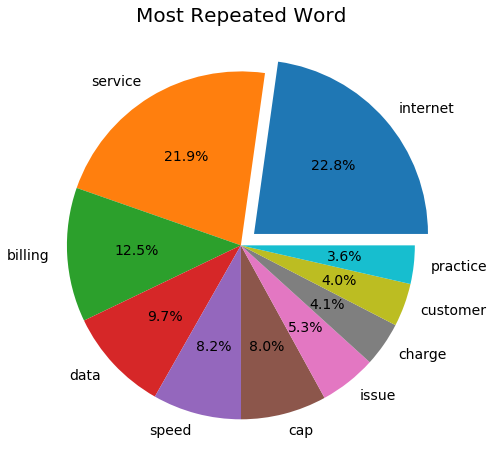

In [27]:
# Visualize the pie graph representing the 10 mostly frequently used words and their percentage overall
plt.figure(figsize=(8,8))
explode = (0.1,0,0,0,0,0,0,0,0,0)
plt.pie(Most_Used_Words.Count.to_list(), labels=Most_Used_Words.Words.to_list(), explode=explode, autopct='%1.1f%%',  textprops={'fontsize': 14})
plt.title("Most Repeated Word", fontdict = {'fontsize' : 20} )

In [28]:
Most_Used_Words['Count'] = Most_Used_Words['Count'].astype('int')
Most_Used_Words.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Words   10 non-null     object
 1   Count   10 non-null     int32 
dtypes: int32(1), object(1)
memory usage: 248.0+ bytes


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


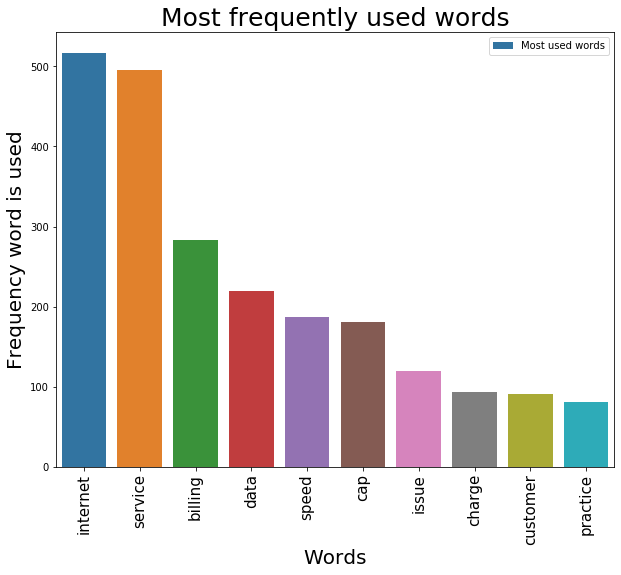

In [29]:
# Visualize the bar graph representing the 10 mostly frequently used words
import seaborn as sns
plt.figure(figsize=(10,8))
ax = sns.barplot(Most_Used_Words.Words,Most_Used_Words.Count,label='Most used words')
plt.tick_params(axis="x",labelrotation=90, labelsize = 15)
plt.xlabel("Words", fontdict = {'fontsize' : 20})
plt.ylabel("Frequency word is used", fontdict = {'fontsize' : 20})
plt.title("Most frequently used words", fontdict = {'fontsize' : 25})
plt.legend()

In [30]:
# Create a Dataframe to capture frequently used 100 words
WordCloudText = Word_Cloud.iloc[:100,:]
WordCloudText.head(5)

,Words,Count
0,internet,517
1,service,496
2,billing,283
3,data,219
4,speed,187


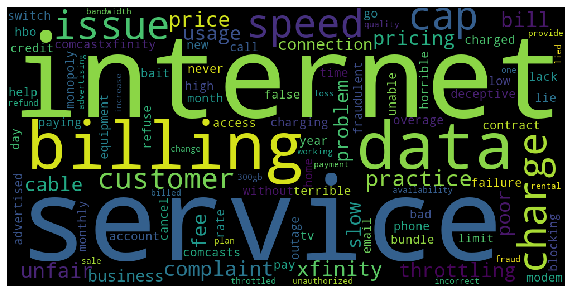

In [31]:
# Visualize the 100 most frequently used words 
word_in_list = WordCloudText['Words'].to_list()
unique_words=(" ").join(word_in_list)
wordcloud = WordCloud(width = 1000, height = 500, max_words=100).generate(unique_words)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Analysis 4 -> Create a new categorical variable - Open and Closed. 

In [32]:
# View the Unique values in Status feature
data_set['Status'].unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [33]:
# Define a method to change the status depending in the input
def define_status(status):
    if (status == 'Open') | (status == 'Pending'):
        return 'Open'
    if (status == 'Closed') | (status == 'Solved'):
        return 'Closed'

In [34]:
# Create a new feature in data set and apply the above define function to it
data_set['Status_Updated'] = data_set['Status'].apply([define_status])

In [35]:
data_set.head(5)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month,Status_Updated
0,250635,Comcast Cable Internet Speeds,2015-04-22,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,Closed
1,223441,Payment disappear - service got disconnected,2015-08-04,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8,Closed
2,242732,Speed and Service,2015-04-18,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4,Closed
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-07-05,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7,Open
4,307175,Comcast not working and no service to boot,2015-05-26,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5,Closed


Analysis Result: We can see, using the function define_status, we have changed the status of 'Open' and 'Pending' Tickets as 'Open' and the status of 'Closed' and 'Solved' tickets as 'Closed'

# Analysis Task 5 - View state wise status of complaints in a stacked bar chart

In [36]:
# Groupby using State and Status_Updated feature
state_status_group = data_set.groupby(["State","Status_Updated"])
state_status_group.size().head(5)

State     Status_Updated
Alabama   Closed            17
          Open               9
Arizona   Closed            14
          Open               6
Arkansas  Closed             6
dtype: int64

In [37]:
# Unstack the data frame to view the total no of Open and Closed issues in form of a feature
state_status = state_status_group.size().unstack().fillna(0)
state_status.head(5)

Status_Updated,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0


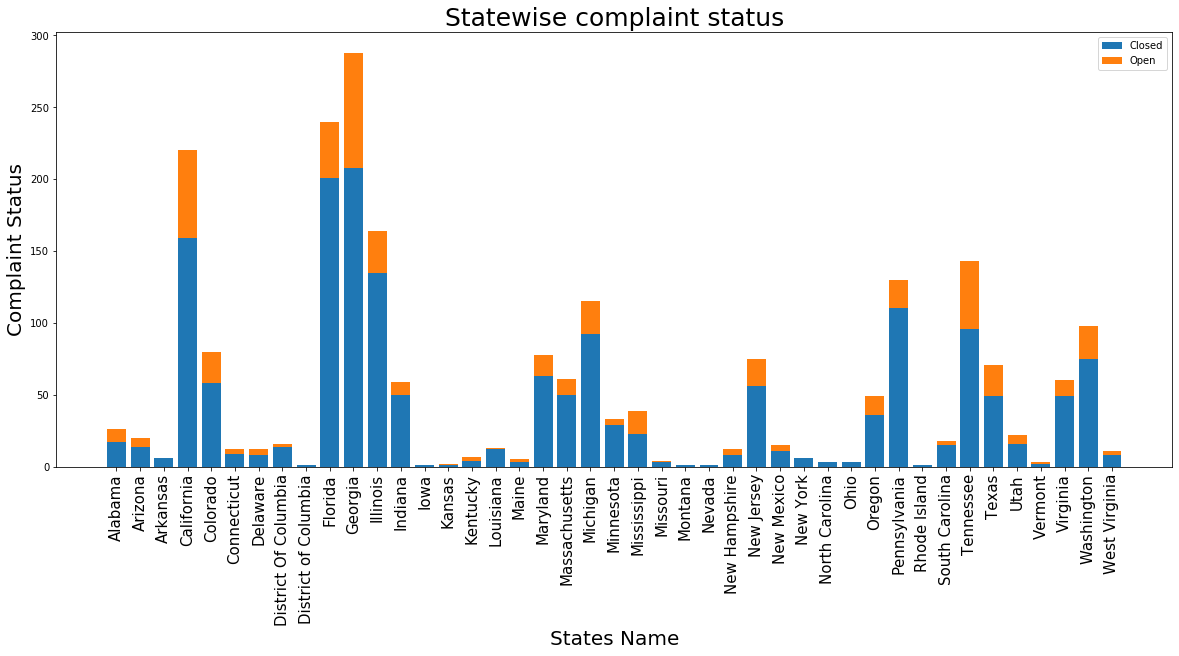

In [38]:
# Visualize the statewise status of complaints in a stacked bar chart
plt.figure(figsize=(20,8))
plt.bar(state_status.index,state_status['Closed'],label='Closed')
plt.bar(state_status.index,state_status['Open'],bottom=state_status['Closed'],label='Open')
plt.tick_params(axis="x",labelrotation=90, labelsize = 15)
plt.xlabel("States Name", fontdict = {'fontsize' : 20})
plt.ylabel("Complaint Status", fontdict = {'fontsize' : 20})
plt.title("Statewise complaint status", fontdict = {'fontsize' : 25})
plt.legend()

# Analysis Task 5 (a) - State with maximum  no of complaints

In [39]:
# Group the data with 'State' feature and sort the data so as to see maximum tickets at top
group_state = data_set.groupby(["State"]).size().sort_values(ascending=False).to_frame()
group_state = group_state.rename({0:'Total Complaints'}, axis=1)
maximum_complaint_state = group_state['Total Complaints'].idxmax()
maximum_complaint_state

'Georgia'

In [40]:
group_state = group_state.reset_index()

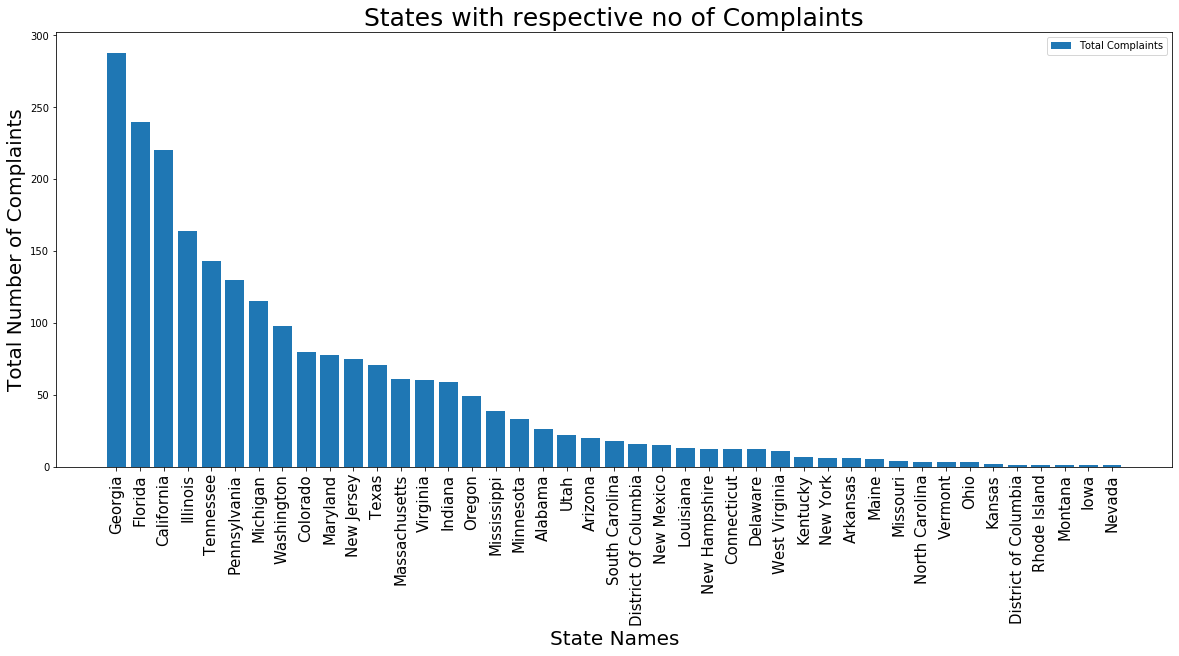

In [41]:
# Visualize the state with maximum number of complaints
plt.figure(figsize=(20,8))
plt.bar(group_state.State,group_state['Total Complaints'],label='Total Complaints')
plt.tick_params(axis="x",labelrotation=90, labelsize = 15)
plt.xlabel("State Names", fontdict = {'fontsize' : 20})
plt.ylabel("Total Number of Complaints", fontdict = {'fontsize' : 20})
plt.title("States with respective no of Complaints", fontdict = {'fontsize' : 25})
plt.legend()

Analysis Result: With the output above, generated using idxmax() function, we can say that, the state 'Georgia' has maximum no of complaints. Also, the above bar graph confirms the analysis done. 'Georgia' state has maximum tickets with count of 288

# Analysis Task 5 (b) -> State with maximum unresolved complaint percentage

In [42]:
# Create a feature with total no of compplaints
state_status['Total'] = state_status['Open'].astype('int')+state_status['Closed'].astype('int')

In [43]:
# Define a function to calculate the the Unresolved complaint % for respective states
def percentage_open(value):
    for i in range(len(value)):
        return ((value/state_status.Total)*100).astype('int')
    
state_status['Unresolved %'] = state_status['Open'].apply([percentage_open])

In [44]:
# Find the state with maximum unresolved complaint percentage
maximum_unresolved_complaint_state =  state_status['Unresolved %'].idxmax()
maximum_unresolved_complaint_state

'Kansas'

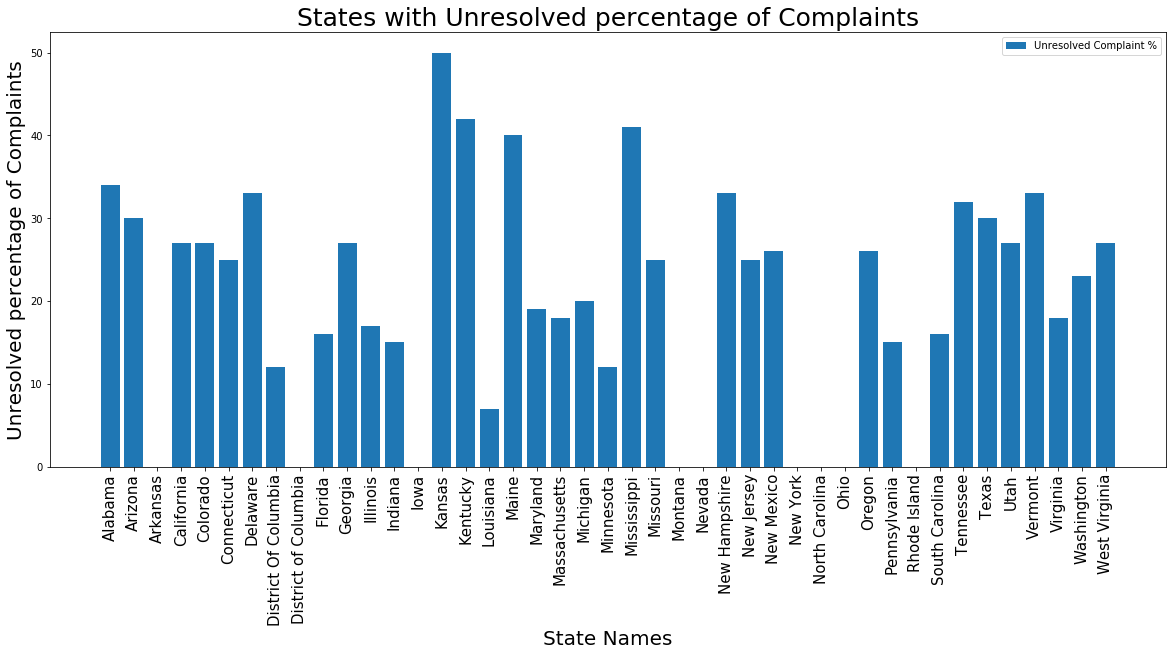

In [45]:
# Visualize the state with maximum unresolved complaint percentage
plt.figure(figsize=(20,8))
plt.bar(state_status.index,state_status['Unresolved %'],label='Unresolved Complaint %')
plt.tick_params(axis="x",labelrotation=90, labelsize = 15)
plt.xlabel("State Names", fontdict = {'fontsize' : 20})
plt.ylabel("Unresolved percentage of Complaints", fontdict = {'fontsize' : 20})
plt.title("States with Unresolved percentage of Complaints", fontdict = {'fontsize' : 25})
plt.legend()

Analysis Result: With the output above, calculated using idxmax() function, we can say that 'Kansas' state has the maximum unresolved complaint percentage, with almost 50% of the complaints in Open status. We can visualize the same in the bar graph.

# Analysis Task 6 -> Resolved complaint percentage with respect to complaints received via different medium

In [46]:
# Group by the data set with 'Recieved Via' and 'Status_Updated' features
recieved_via_group = data_set.groupby(["Received Via","Status_Updated"]).size().unstack()
recieved_via_group['Total']= recieved_via_group['Open'].astype('int')+recieved_via_group['Closed'].astype('int')

In [47]:
# Create a function to calculate the Resolved Complaint %, for the complaints recieved via different medium
def resolved_percentage(value):
    for i in range(len(value)):
        return ((value/recieved_via_group.Total)*100).astype(int)

recieved_via_group['Resolved %'] = recieved_via_group.Closed.apply([resolved_percentage])
recieved_via_group

Status_Updated,Closed,Open,Total,Resolved %
Received Via,,,,
Customer Care Call,864,255,1119,77
Internet,843,262,1105,76


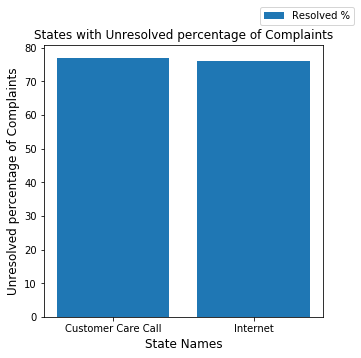

In [48]:
# Visualize the Resolved complaint percentage with respect to complaints received via different medium
plt.figure(figsize=(5,5))
plt.bar(recieved_via_group.index,recieved_via_group['Resolved %'],label='Resolved %')
plt.tick_params(axis="x", labelsize = 10)
plt.xlabel("State Names", fontdict = {'fontsize' : 12})
plt.ylabel("Unresolved percentage of Complaints", fontdict = {'fontsize' : 12})
plt.title("States with Unresolved percentage of Complaints", fontdict = {'fontsize' : 12})
plt.legend(bbox_to_anchor=(1, 1),bbox_transform=plt.gcf().transFigure)

Analysis Result: With above table and bar graph, we conclude that the complaints received via 'Internet' and 'Customer Care calls are equally prioritized and resolved.